In [1]:
%%bash
git clone https://github.com/benihime91/leaf-disease-classification-kaggle.git
cd /kaggle/working/leaf-disease-classification-kaggle/
pip install --upgrade -r requirements.txt
wandb login a74f67fd5fae293e301ea8b6710ee0241f595a63

  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=1952dcb2ffbd50fedfc5073ed05b6c64795a0d972fe3b9116f5d5f82840a2959
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: wandb
    Found existing installation: wandb 0.10.12
    Uninstalling wandb-0.10.12:
      Successfully uninstalled wandb-0.10.12
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


Cloning into 'leaf-disease-classification-kaggle'...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datashader 0.11.1 requires numba!=0.49.*,!=0.50.*,>=0.37.0, but you have numba 0.49.1 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
import sys
sys.path.append('/kaggle/working/leaf-disease-classification-kaggle/')

In [3]:
# display config only
!python leaf-disease-classification-kaggle/hydra_run.py --config-name 02-01-20-effnet3 \
optimizer=adam scheduler=sgdr learning_rate=5e-03 optimizer.weight_decay=1e-06 batch_size=32 -c job

# @package _global_
curr_fold: 0
image_dir: ${general.image_dir}
csv_path: ${general.csv_path}
encoder: tf_efficientnet_b3_ns
accumulate_batches: 1
clip_grad_norm: 1.0
image_dims: 512
num_epochs: 10
batch_size: 32
learning_rate: 0.005
lr_mult: 100
augmentations:
  train:
  - _target_: albumentations.RandomResizedCrop
    height: ${image_dims}
    width: ${image_dims}
    p: 1.0
  - _target_: albumentations.Resize
    height: ${image_dims}
    width: ${image_dims}
    p: 1.0
  - _target_: albumentations.RandomBrightnessContrast
    brightness_limit: 0.1
    contrast_limit: 0.1
    p: 1.0
  - _target_: albumentations.HorizontalFlip
    p: 0.5
  - _target_: albumentations.Normalize
    p: 1.0
    max_pixel_value: 255.0
  - _target_: albumentations.pytorch.transforms.ToTensorV2
    p: 1.0
  valid:
  - _target_: albumentations.Resize
    height: ${image_dims}
    width: ${image_dims}
    p: 1.0
  - _target_: albumentations.Normalize
    p: 1.0
    max_pixel_value: 255.0
  - _target_: albume

In [4]:
# run learning-rate finder
!python leaf-disease-classification-kaggle/run_lrfinder.py --config-name 02-01-20-effnet3 \
optimizer=adam scheduler=sgdr learning_rate=5e-03 optimizer.weight_decay=1e-06 batch_size=32

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b3_ns-9d44bf68.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b3_ns-9d44bf68.pth
[2021-01-06 12:07:28,869][src.lightning.core][INFO] - Mixmethod : SnapMix
[2021-01-06 12:07:28,870][src.lightning.core][INFO] - Loss Function : LabelSmoothingCrossEntropy()
GPU available: True, used: True
[2021-01-06 12:07:30,617][lightning][INFO] - GPU available: True, used: True
TPU available: False, using: 0 TPU cores
[2021-01-06 12:07:30,618][lightning][INFO] - TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[2021-01-06 12:07:30,618][lightning][INFO] - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using native 16bit precision.
[2021-01-06 12:07:30,619][lightning][INFO] - Using native 16bit precision.
[2021-01-06 12:07:30,754][src.lightning.core][INFO] - DATA: /kaggle/input/cassava-leaf-disease-classification/train_images/
[2021-01-06 12:07:30,754][src

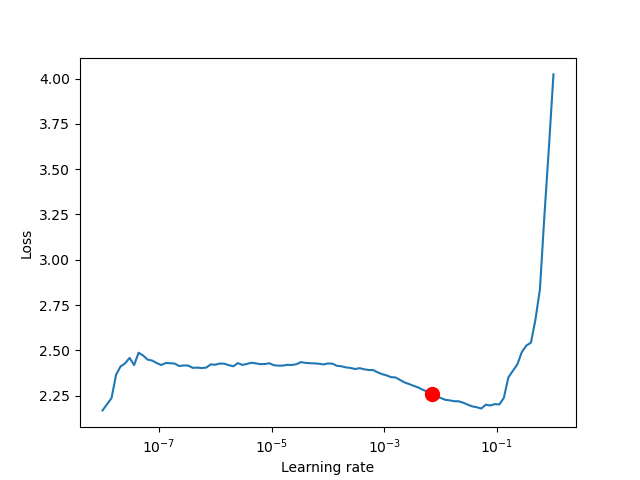

In [6]:
# view lr_finder results
from IPython.display import Image
Image('models/lr-finder-plot.png')

In [ ]:
!python leaf-disease-classification-kaggle/hydra_run.py --config-name 02-01-20-effnet3 \
optimizer=adam scheduler=sgdr learning_rate=5e-03 optimizer.weight_decay=1e-06 batch_size=32